In [1]:
"""
This script imports necessary libraries and custom functions.

Imports:
    
    get_city_bikes_data: A custom function to fetch city bikes data.
    get_foursquare_data: A custom function to fetch data from Foursquare API.
    get_yelp_data: A custom function to fetch data from Yelp API.
"""
import requests
import pandas as pd
from api_utils import get_city_bikes_data,get_foursquare_data
from get_yelp_data import get_yelp_data


In [2]:
# Get the city's bike station data
"""
This script retrieves bike station data for a specified city and uses the latitude and longitude of the first bike station to get Yelp data for nearby businesses.

Functions:
    get_city_bikes_data(city: str) -> pd.DataFrame:
        Retrieves bike station data for the specified city.
        
    get_yelp_data(latitude: float, longitude: float) -> pd.DataFrame:
        Retrieves Yelp data for businesses near the specified latitude and longitude.

Variables:
    city_name (str): The name of the city for which to retrieve bike station data.
    hamilton_df (pd.DataFrame): DataFrame containing bike station data for the specified city.
    latitude (float): Latitude of the first bike station in the DataFrame.
    longitude (float): Longitude of the first bike station in the DataFrame.
    yelp_df (pd.DataFrame): DataFrame containing Yelp data for businesses near the specified latitude and longitude.
"""
city_name = 'hamilton'
hamilton_df = get_city_bikes_data(city=city_name)
print(hamilton_df.head())

# Direct access to latitude and longitude for the first bike station
latitude = hamilton_df['latitude'][0]
longitude = hamilton_df['longitude'][0]              

yelp_df = get_yelp_data(latitude, longitude)

print(yelp_df.head())

                                 id                      name   latitude  \
0  024a3edf037cb411d16acc08a7fcb954           Bay at Strachan  43.267859   
1  0263c2af4dcdc215b9c81753a8df8a9a              MAC Rack ITB  43.259178   
2  0265404843dccbf9378ce9d56a570914           Augusta at John  43.251632   
3  05e87b8200ed015e7fb61865b83e3013          Hunter GO Centre  43.253330   
4  05fffdca01b4d886a823b025b6a04080  Maple at Rothsay - ERI08  43.242163   

   longitude  free_bikes  empty_slots  
0 -79.867923           2           19  
1 -79.920503           1           12  
2 -79.868980           4            5  
3 -79.869533           3           13  
4 -79.825003           3            6  
Making request to Yelp for term 'restaurants'...
Making request to Yelp for term 'libraries'...
Making request to Yelp for term 'shopping'...
                name                 address   latitude  longitude  rating  \
0    Born and Raised      224 James Street N  43.262350 -79.866260     3.8   
1    

Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [3]:

"""
Processes Yelp data for each bike station in the Hamilton DataFrame and combines the results.
This script iterates over each row in the `hamilton_df` DataFrame, which contains information about bike stations.
For each bike station, it filters points of interest (POIs) from the `yelp_df` DataFrame that are within 1000 meters
of the bike station. The filtered Yelp data is then appended to a list, and finally, all the filtered data is combined
into a single DataFrame.
Variables:
    yelp_results (list): A list to store the filtered Yelp data for each bike station.
    index (int): The index of the current row in the `hamilton_df` DataFrame.
    row (Series): The current row in the `hamilton_df` DataFrame.
    lat (float): The latitude of the current bike station.
    lon (float): The longitude of the current bike station.
    filtered_yelp (DataFrame): The filtered Yelp data for the current bike station.
    yelp_combined_df (DataFrame): The combined Yelp data for all bike stations.
DataFrames:
    hamilton_df (DataFrame): DataFrame containing information about bike stations.
    yelp_df (DataFrame): DataFrame containing Yelp data with a 'distance_meters' column.
    yelp_combined_df (DataFrame): DataFrame containing the combined filtered Yelp data for all bike stations.
"""
yelp_results = []

for index, row in hamilton_df.iterrows():
    lat, lon = row['latitude'], row['longitude']
    print(f"Processing Yelp data for bike station: {row['name']} at ({lat}, {lon})...")
    
    filtered_yelp = yelp_df[
        yelp_df['distance_meters'] <= 1000
    ].copy()  # Use .copy() to avoid modifying the original yelp_df
    
    filtered_yelp['bike_station_id'] = row['id']
    
    yelp_results.append(filtered_yelp)

yelp_combined_df = pd.concat(yelp_results, ignore_index=True)


Processing Yelp data for bike station: Bay at Strachan at (43.26785864558976, -79.8679232597351)...
Processing Yelp data for bike station: MAC Rack ITB at (43.25917772795342, -79.92050260305405)...
Processing Yelp data for bike station: Augusta at John at (43.251632328780424, -79.86898005008698)...
Processing Yelp data for bike station: Hunter GO Centre at (43.253329975544275, -79.86953258514404)...
Processing Yelp data for bike station: Maple at Rothsay - ERI08 at (43.24216273334376, -79.8250025510788)...
Processing Yelp data for bike station: Whitney at Lower Horning at (43.2518522355378, -79.9354198942367)...
Processing Yelp data for bike station: Frid at Main at (43.25940517059312, -79.89262372255325)...
Processing Yelp data for bike station: Locke at Hunter at (43.256556155396176, -79.88510146737099)...
Processing Yelp data for bike station: Mac Rack Kingswalk Bridge at (43.2605943166216, -79.91715118288994)...
Processing Yelp data for bike station: James North at Mulberry at (43.

In [4]:
yelp_combined_df.head()

,name,address,latitude,longitude,rating,review_count,distance_meters,term,bike_station_id
0,Born and Raised,224 James Street N,43.262350,-79.866260,3.8,27,618.142975,restaurants,024a3edf037cb411d16acc08a7fcb954
1,Charred Chicken,244 James Street N,43.262736,-79.866384,4.2,121,583.045938,restaurants,024a3edf037cb411d16acc08a7fcb954
2,Mesa,255 James Street N,43.263060,-79.866450,4.1,56,545.679223,restaurants,024a3edf037cb411d16acc08a7fcb954
3,El Grito Mexicano,236 James Street N,43.262600,-79.866237,5.0,1,600.437633,restaurants,024a3edf037cb411d16acc08a7fcb954
4,Shawarma Royale Plus,114 York Blvd,43.260103,-79.872464,5.0,1,939.569064,restaurants,024a3edf037cb411d16acc08a7fcb954


In [5]:
# Step 3: Join the Bike Stations Data with the Yelp Data
"""
Join the Bike Stations Data with the Yelp Data.

This step merges the `hamilton_df` DataFrame containing bike stations data with the `yelp_combined_df` DataFrame containing Yelp data. 
The merge is performed on the 'id' column from `hamilton_df` and the 'bike_station_id' column from `yelp_combined_df` using an inner join.

Returns:
    DataFrame: A DataFrame resulting from the inner join of `hamilton_df` and `yelp_combined_df`.

Example:
"""
joined_df = pd.merge(hamilton_df, yelp_combined_df, left_on='id', right_on='bike_station_id', how='inner')
joined_df.head()



,id,name_x,latitude_x,longitude_x,free_bikes,empty_slots,name_y,address,latitude_y,longitude_y,rating,review_count,distance_meters,term,bike_station_id
0,024a3edf037cb411d16acc08a7fcb954,Bay at Strachan,43.267859,-79.867923,2,19,Born and Raised,224 James Street N,43.262350,-79.866260,3.8,27,618.142975,restaurants,024a3edf037cb411d16acc08a7fcb954
1,024a3edf037cb411d16acc08a7fcb954,Bay at Strachan,43.267859,-79.867923,2,19,Charred Chicken,244 James Street N,43.262736,-79.866384,4.2,121,583.045938,restaurants,024a3edf037cb411d16acc08a7fcb954
2,024a3edf037cb411d16acc08a7fcb954,Bay at Strachan,43.267859,-79.867923,2,19,Mesa,255 James Street N,43.263060,-79.866450,4.1,56,545.679223,restaurants,024a3edf037cb411d16acc08a7fcb954
3,024a3edf037cb411d16acc08a7fcb954,Bay at Strachan,43.267859,-79.867923,2,19,El Grito Mexicano,236 James Street N,43.262600,-79.866237,5.0,1,600.437633,restaurants,024a3edf037cb411d16acc08a7fcb954
4,024a3edf037cb411d16acc08a7fcb954,Bay at Strachan,43.267859,-79.867923,2,19,Shawarma Royale Plus,114 York Blvd,43.260103,-79.872464,5.0,1,939.569064,restaurants,024a3edf037cb411d16acc08a7fcb954


In [122]:
# Save the DataFrame to the specified location
file_path = '/Users/fitsumbahlebi/Desktop/repo2/Statistical-Modelling-with-Python/data/joined_df.csv'
joined_df.to_csv(file_path, index=False)

print(f"The DataFrame has been successfully saved to {file_path}.")

The DataFrame has been successfully saved to /Users/fitsumbahlebi/Desktop/repo2/Statistical-Modelling-with-Python/data/joined_df.csv.


Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

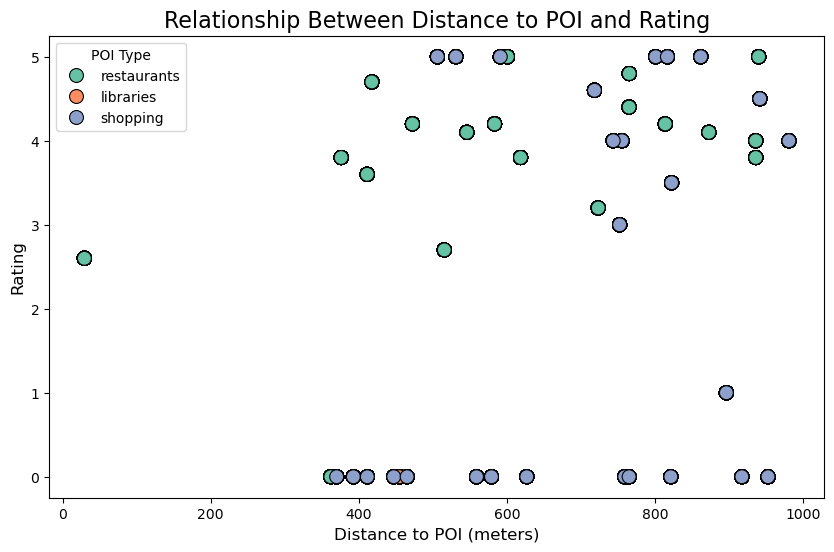

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
"""
This script visualizes the relationship between the distance to a point of interest (POI) and the rating for each venue using a scatter plot.

Steps:
1. Plot the relationship between distance and rating for each venue (Yelp) using Seaborn's scatterplot.
2. Enhance the plot by adding a title, axis labels, and a legend.

Dependencies:
- matplotlib.pyplot
- seaborn

Variables:
- joined_df: DataFrame containing the data to be plotted. It should have columns 'distance_meters', 'rating', and 'term'.

Plot Details:
- X-axis: Distance to POI in meters.
- Y-axis: Rating of the venue.
- Hue: Different venue types, distinguished by the 'term' column.
- Palette: Set2 color palette.
- Marker size: 100.
- Edge color: Black.
"""


# Step 1: Plot the relationship between distance and rating for each venue (Yelp)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=joined_df, x='distance_meters', y='rating', hue='term', palette='Set2', s=100, edgecolor='black')

# Step 2: Enhance the plot
plt.title('Relationship Between Distance to POI and Rating', fontsize=16)
plt.xlabel('Distance to POI (meters)', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.legend(title='POI Type', loc='upper left')

# Show the plot
plt.show()


**Interpretation of the Scatter Plot: Relationship Between Distance to POI and Rating**

*   **Overall Plot:** The scatter plot displays the relationship between the distance of a Point of Interest (POI) from a bike station (in meters) and the rating of that POI. The points are also colored to represent different types of POIs ("Venue Type").

*   **Rating Distribution:**
    *   **Clustering:** The points tend to cluster around certain rating values (e.g., at around rating = 4, and rating = 5, and at 0), rather than being distributed uniformly.
    *   **High Ratings:** A large portion of the POIs have ratings between 4 and 5, particularly the "restaurants" category.
    *   **Lower Ratings:** Some POIs have lower ratings, particularly "libraries," with some values at `0`.

*   **Distance Distribution:**
    *   **Range:** The distances of POIs range from very close to the station to about 1000 meters.
    *   **Density:** Many of the POIs are concentrated in the lower and mid-range distance (between 250-750 meters), with fewer POIs in close proximity, or very far away.

*   **Relationship Between Distance and Rating:**
    *   **No Strong Correlation:** There is not a strong correlation or linear trend visible between the distance and the rating, as both low and high rated POIs are located across a wide range of distances.
    *  **Lower Ratings at Mid-Distance:** The very low rating POIs seem to be concentrated between the 250-1000 meter range.

*   **POI Categories (Venue Types):**
    *   **Restaurants (teal):** These tend to have higher ratings and exist across many ranges of distance.
    *   **Libraries (coral):** Libraries are all located at a rating of zero. They are all located between the 250-1000 meter range.
    *   **Shopping (light purple):** Shopping POIs are present in all ranges of distance and are generally at high ratings (3 and above).


# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

Look at the data before and after the join to validate your data.

In [124]:
import sqlite3
import os
"""
This script performs the following tasks:

1. Creates a SQLite database in the `data/` directory.
2. Saves dataframes to the database:
    - Saves the original bike stations data to the `bike_stations` table.
    - Saves the cleaned POIs data to the `pois` table.
    - Saves the joined data to the `joined_data` table.
3. Validates the data by:
    - Printing the number of rows in each table.
    - Inspecting the first 5 rows of the `joined_data` table.
4. Closes the database connection.

Dependencies:
- sqlite3: For creating and interacting with the SQLite database.
- os: For creating directories.
- pandas (pd): For reading from and writing to the SQLite database.

Usage:
- Ensure the dataframes `hamilton_df`, `yelp_df`, and `joined_df` are defined before running this script.
- Run the script to create the database, save the dataframes, validate the data, and close the connection.
"""


# Step 1: Create the database in the `data/` directory
os.makedirs('data', exist_ok=True)  # Ensure the directory exists
db_path = '/Users/fitsumbahlebi/Desktop/repo2/Statistical-Modelling-with-Python/data/project_results.db'
conn = sqlite3.connect(db_path)

# Step 2: Save dataframes to the database
# Save the original bike stations data
hamilton_df.to_sql('bike_stations', conn, if_exists='replace', index=False)

# Save the cleaned POIs data
yelp_df.to_sql('pois', conn, if_exists='replace', index=False)

# Save the joined data
joined_df.to_sql('joined_data', conn, if_exists='replace', index=False)

print(f"Data successfully stored in {db_path}")

# Step 3: Validate the data
# Example queries to inspect the database

# Check the number of rows in each table
print("Number of rows in bike_stations:", pd.read_sql_query("SELECT COUNT(*) FROM bike_stations", conn).iloc[0, 0])
print("Number of rows in pois:", pd.read_sql_query("SELECT COUNT(*) FROM pois", conn).iloc[0, 0])
print("Number of rows in joined_data:", pd.read_sql_query("SELECT COUNT(*) FROM joined_data", conn).iloc[0, 0])

# Inspect joined data
print(pd.read_sql_query("SELECT * FROM joined_data LIMIT 5", conn))

# Step 4: Close the connection
conn.close()


Data successfully stored in /Users/fitsumbahlebi/Desktop/repo2/Statistical-Modelling-with-Python/data/project_results.db
Number of rows in bike_stations: 190
Number of rows in pois: 106
Number of rows in joined_data: 9690
                                 id           name_x  latitude_x  longitude_x  \
0  024a3edf037cb411d16acc08a7fcb954  Bay at Strachan   43.267859   -79.867923   
1  024a3edf037cb411d16acc08a7fcb954  Bay at Strachan   43.267859   -79.867923   
2  024a3edf037cb411d16acc08a7fcb954  Bay at Strachan   43.267859   -79.867923   
3  024a3edf037cb411d16acc08a7fcb954  Bay at Strachan   43.267859   -79.867923   
4  024a3edf037cb411d16acc08a7fcb954  Bay at Strachan   43.267859   -79.867923   

   free_bikes  empty_slots                name_y             address  \
0          10           14     El Grito Mexicano  236 James Street N   
1          10           14       Charred Chicken  244 James Street N   
2          10           14               Synonym  328 James Street N   
3  

In [10]:
joined_df.head()

,id,name_x,latitude_x,longitude_x,free_bikes,empty_slots,name_y,address,latitude_y,longitude_y,rating,review_count,distance_meters,term
0,024a3edf037cb411d16acc08a7fcb954,Bay at Strachan,43.267859,-79.867923,2,19,Born and Raised,224 James Street N,43.262350,-79.866260,3.8,27,618.142975,restaurants
1,024a3edf037cb411d16acc08a7fcb954,Bay at Strachan,43.267859,-79.867923,2,19,Charred Chicken,244 James Street N,43.262736,-79.866384,4.2,121,583.045938,restaurants
2,024a3edf037cb411d16acc08a7fcb954,Bay at Strachan,43.267859,-79.867923,2,19,Mesa,255 James Street N,43.263060,-79.866450,4.1,56,545.679223,restaurants
3,024a3edf037cb411d16acc08a7fcb954,Bay at Strachan,43.267859,-79.867923,2,19,El Grito Mexicano,236 James Street N,43.262600,-79.866237,5.0,1,600.437633,restaurants
4,024a3edf037cb411d16acc08a7fcb954,Bay at Strachan,43.267859,-79.867923,2,19,Shawarma Royale Plus,114 York Blvd,43.260103,-79.872464,5.0,1,939.569064,restaurants
